In [1]:
from airplane import Airplane
from receiver import Receiver

airplane1 = Airplane('782034',[120.128234,30.2141348],[115.86143245,28.750012],180,1564503340)
receiver1 = Receiver([114.122588,36.548925])
time_track1 =receiver1.fin_time_track(airplane1)
track1 = airplane1.gettrack()

In [ ]:
print(track1)

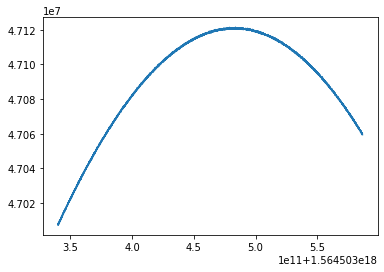

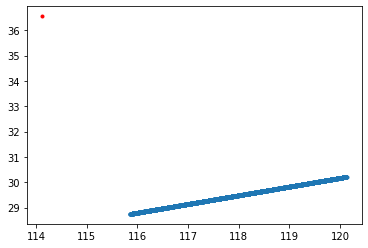

In [2]:
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt,pi, atan

using_data = time_track1
test_data = []#前后两两时间差

for i in range(len(using_data)-1):
    test_data.append(using_data[i+1]-using_data[i]-airplane1.geodistance(track1[i+1],receiver1.location)*10/3)


plt.plot(using_data[:-1], test_data)
plt.show()

receiver1.plt_location(airplane1)

In [3]:
# len(using_data)
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

test_data = torch.tensor(track1[0:4000])
print(test_data)
test_size = 25
train_set = test_data[: -test_size]
test_set = test_data[-test_size:]

print(train_set)
print(test_set)

tensor([[120.1282,  30.2141],
        [120.1274,  30.2138],
        [120.1265,  30.2135],
        ...,
        [116.6703,  29.0276],
        [116.6695,  29.0273],
        [116.6686,  29.0270]])
tensor([[120.1282,  30.2141],
        [120.1274,  30.2138],
        [120.1265,  30.2135],
        ...,
        [116.6920,  29.0350],
        [116.6911,  29.0347],
        [116.6902,  29.0344]])
tensor([[116.6894,  29.0341],
        [116.6885,  29.0338],
        [116.6876,  29.0335],
        [116.6868,  29.0332],
        [116.6859,  29.0329],
        [116.6850,  29.0326],
        [116.6842,  29.0323],
        [116.6833,  29.0320],
        [116.6824,  29.0317],
        [116.6816,  29.0314],
        [116.6807,  29.0311],
        [116.6798,  29.0308],
        [116.6790,  29.0305],
        [116.6781,  29.0303],
        [116.6772,  29.0300],
        [116.6764,  29.0297],
        [116.6755,  29.0294],
        [116.6747,  29.0291],
        [116.6738,  29.0288],
        [116.6729,  29.0285],
        [116

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(-1,1))


# train_set_array = np.array(train_set)
# train_norm = sc.fit_transform(train_set_array.reshape(-1,1))
train_norm = train_set.cuda()

In [5]:
def input_data(seq,ws):
    out = []
    L = len(seq)

    for i in range(L-ws):
        window = seq[i : i+ws]
        label = seq[i+ws : i+ws+1]
        out.append((window,label))

    return out



window_size = 25
train_data = input_data(train_norm, window_size)
# print(train_data)
print(len(train_data))
print(train_data[0])

3950
(tensor([[120.1282,  30.2141],
        [120.1274,  30.2138],
        [120.1265,  30.2135],
        [120.1256,  30.2132],
        [120.1248,  30.2129],
        [120.1239,  30.2127],
        [120.1230,  30.2124],
        [120.1222,  30.2121],
        [120.1213,  30.2118],
        [120.1204,  30.2115],
        [120.1196,  30.2112],
        [120.1187,  30.2109],
        [120.1179,  30.2106],
        [120.1170,  30.2103],
        [120.1161,  30.2100],
        [120.1153,  30.2097],
        [120.1144,  30.2094],
        [120.1135,  30.2091],
        [120.1127,  30.2088],
        [120.1118,  30.2085],
        [120.1109,  30.2082],
        [120.1101,  30.2079],
        [120.1092,  30.2076],
        [120.1083,  30.2073],
        [120.1075,  30.2070]], device='cuda:0'), tensor([[120.1066,  30.2067]], device='cuda:0'))


In [10]:
class LSTM(nn.Module):
    def __init__(self, input_size=2, hidden_size=100,out_size=2):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size,out_size)
        self.hidden = ( torch.zeros(1, 1, hidden_size), torch.zeros(1, 1, hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        pred= self.linear(lstm_out.view(len(seq), -1))

        return pred[-1]


torch.manual_seed(42)
model = LSTM().cuda()
# train_data.cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.005)


print(model)


for p in model.parameters():
    print(p.numel())

LSTM(
  (lstm): LSTM(2, 100)
  (linear): Linear(in_features=100, out_features=2, bias=True)
)
800
40000
400
400
200
2


In [11]:
epochs = 50
future =25

for i in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1, model.hidden_size).cuda(), torch.zeros(1,1, model.hidden_size).cuda())
        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
    
    preds = train_set [-window_size:].tolist()
    
    print( f" Epoch {i} Loss:  {loss.item()}")


 Epoch 0 Loss:  1.2878830602858216e-05
 Epoch 1 Loss:  1.2839098417316563e-05
 Epoch 2 Loss:  1.2842247087974101e-05
 Epoch 3 Loss:  1.2915472325403243e-05


KeyboardInterrupt: 

In [12]:
future = 25
preds = train_norm[-window_size:].tolist()

print(preds)
model.eval()

for i in range(future):
    seq = torch.Tensor(preds[-window_size:]).cuda()
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size).cuda(),torch.zeros(1,1,model.hidden_size).cuda())
        preds.append(model(seq).tolist())

# print(preds)

[[116.71098327636719, 29.04153060913086], [116.71012115478516, 29.04123306274414], [116.70925903320312, 29.040937423706055], [116.70838928222656, 29.040639877319336], [116.70752716064453, 29.040342330932617], [116.70665740966797, 29.04004669189453], [116.70579528808594, 29.039749145507812], [116.7049331665039, 29.039451599121094], [116.70406341552734, 29.039155960083008], [116.70320129394531, 29.03885841369629], [116.70233154296875, 29.03856086730957], [116.70146942138672, 29.038265228271484], [116.70060729980469, 29.037967681884766], [116.69973754882812, 29.03767204284668], [116.6988754272461, 29.03737449645996], [116.69800567626953, 29.037076950073242], [116.6971435546875, 29.036781311035156], [116.69628143310547, 29.036483764648438], [116.6954116821289, 29.03618621826172], [116.69454956054688, 29.035890579223633], [116.69368743896484, 29.035593032836914], [116.69281768798828, 29.035295486450195], [116.69195556640625, 29.03499984741211], [116.69108581542969, 29.03470230102539], [116.

In [13]:
print(torch.Tensor(preds))

tensor([[116.7110,  29.0415],
        [116.7101,  29.0412],
        [116.7093,  29.0409],
        [116.7084,  29.0406],
        [116.7075,  29.0403],
        [116.7067,  29.0400],
        [116.7058,  29.0397],
        [116.7049,  29.0395],
        [116.7041,  29.0392],
        [116.7032,  29.0389],
        [116.7023,  29.0386],
        [116.7015,  29.0383],
        [116.7006,  29.0380],
        [116.6997,  29.0377],
        [116.6989,  29.0374],
        [116.6980,  29.0371],
        [116.6971,  29.0368],
        [116.6963,  29.0365],
        [116.6954,  29.0362],
        [116.6945,  29.0359],
        [116.6937,  29.0356],
        [116.6928,  29.0353],
        [116.6920,  29.0350],
        [116.6911,  29.0347],
        [116.6902,  29.0344],
        [117.6293,  29.3566],
        [117.6293,  29.3567],
        [117.6293,  29.3567],
        [117.6293,  29.3567],
        [117.6293,  29.3567],
        [117.6293,  29.3567],
        [117.6293,  29.3567],
        [117.6293,  29.3567],
        [1